<a href="https://colab.research.google.com/github/Yusmitha-Lekha/YusmithaLekha_INFO5731_Fall2024/blob/main/Prathi_YusmithaLekha_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [1]:
import pandas as pd
import re
from collections import defaultdict
import os

# Define the path to the review dataset
file_path = 'Imdb_Reviews (2).csv'

# Ensure the file exists and has content
if not os.path.exists(file_path):
    raise FileNotFoundError(f"The file '{file_path}' was not found.")
elif os.path.getsize(file_path) == 0:
    raise ValueError(f"The file '{file_path}' is empty.")

# Attempt to read the dataset one row at a time
try:
    reviews_df = pd.read_csv(file_path, chunksize=1)
except pd.errors.EmptyDataError:
    raise ValueError("No data could be parsed from the file.")

# Helper function to break down text into individual words
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# Generate N-grams for text, with N=3 for trigrams
def generate_ngrams(text, n=3):
    words = tokenize(text)
    ngrams = zip(*[words[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

# Set up counters for different types of text data
trigram_counter = defaultdict(int)
bigram_counter = defaultdict(int)
unigram_counter = defaultdict(int)
review_noun_phrases = []
noun_phrase_counter = defaultdict(int)

# Analyze each review in the dataset
for chunk in reviews_df:  # Process one review at a time
    review_text = chunk.iloc[0]['Review']

    # Count the frequency of trigrams
    trigrams = generate_ngrams(review_text, n=3)
    for trigram in trigrams:
        trigram_counter[trigram] += 1

    # Count the frequency of bigrams and unigrams
    words = tokenize(review_text)
    bigrams = [" ".join([words[i], words[i + 1]]) for i in range(len(words) - 1)]
    for word in words:
        unigram_counter[word] += 1
    for bigram in bigrams:
        bigram_counter[bigram] += 1

    # Extract noun phrases
    def extract_noun_phrases(text):
        words = tokenize(text)
        noun_phrases = []
        i = 0
        while i < len(words) - 1:
            if words[i].isalpha() and words[i + 1].isalpha():
                noun_phrases.append(f"{words[i]} {words[i + 1]}")
                i += 1
            i += 1
        return noun_phrases

    noun_phrases = extract_noun_phrases(review_text)
    review_noun_phrases.append({np: noun_phrases.count(np) for np in noun_phrases})
    for np in noun_phrases:
        noun_phrase_counter[np] += 1

# Sort and display the most frequent trigrams
top_trigrams = sorted(trigram_counter.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top Trigrams:", top_trigrams)

# Calculate probabilities for each bigram
bigram_probabilities = {}
for bigram, count in bigram_counter.items():
    w2 = bigram.split()[0]
    prob = count / unigram_counter[w2]
    bigram_probabilities[bigram] = prob

top_bigram_probs = sorted(bigram_probabilities.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top Bigram Probabilities:", top_bigram_probs)

# Compute relative frequencies for noun phrases
max_noun_phrase_freq = max(noun_phrase_counter.values())
relative_probabilities = []

for i, review_phrases in enumerate(review_noun_phrases):
    row = {"Review": f"Review {i+1}"}
    for noun_phrase, count in review_phrases.items():
        relative_prob = count / max_noun_phrase_freq
        row[noun_phrase] = relative_prob
    relative_probabilities.append(row)

# Create a DataFrame to store and display the relative noun phrase probabilities for the first 100 reviews
relative_prob_df = pd.DataFrame(relative_probabilities).fillna(0)
print("Relative Probabilities Table (First 100 Rows):\n", relative_prob_df.head(100))


Top Trigrams: [('dune part two', 297), ('one of the', 217), ('dune part 2', 186), ('it s a', 153), ('part two is', 139)]
Top Bigram Probabilities: [('interpreted the', 1.0), ('technologies of', 1.0), ('overbearing at', 1.0), ('sentiments about', 1.0), ('slows down', 1.0)]
Relative Probabilities Table (First 100 Rows):
         Review   this is  what hollywood   needs a  great story    with a  \
0     Review 1  0.001086        0.001086  0.001086     0.001086  0.001086   
1     Review 2  0.001086        0.000000  0.000000     0.000000  0.000000   
2     Review 3  0.001086        0.000000  0.000000     0.000000  0.000000   
3     Review 4  0.000000        0.000000  0.000000     0.000000  0.000000   
4     Review 5  0.001086        0.000000  0.000000     0.000000  0.000000   
..         ...       ...             ...       ...          ...       ...   
95   Review 96  0.000000        0.000000  0.000000     0.000000  0.000000   
96   Review 97  0.000000        0.000000  0.000000     0.000000

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [2]:
import pandas as pd
import re
import math
from collections import defaultdict

# Load the dataset and handle any potential issues with file access
file_path = 'Imdb_Reviews (2).csv'
try:
    reviews_df = pd.read_csv(file_path)
except FileNotFoundError:
    raise FileNotFoundError("The specified file was not found.")
except pd.errors.EmptyDataError:
    raise ValueError("The file is empty or improperly formatted.")

# Function to break down text into individual lowercase words
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# 1. Calculate Term Frequency (TF) for each document
# TF measures the frequency of each word within a document
def calculate_tf(documents):
    tf_values = []
    for doc in documents:
        words = tokenize(doc)
        word_count = len(words)
        tf = defaultdict(float)
        for word in words:
            tf[word] += 1 / word_count  # Normalized frequency per word in document
        tf_values.append(tf)
    return tf_values

# 2. Calculate Document Frequency (DF) and Inverse Document Frequency (IDF)
# DF counts documents containing each word, and IDF measures the importance of each word across all documents
def calculate_idf(documents):
    df = defaultdict(int)
    for doc in documents:
        unique_words = set(tokenize(doc))
        for word in unique_words:
            df[word] += 1

    N = len(documents)  # Total number of documents
    idf = {word: math.log(N / df_count) for word, df_count in df.items()}
    return idf

# 3. Construct the TF-IDF Matrix
# TF-IDF matrix combines TF and IDF scores for each word in each document
def build_tf_idf_matrix(tf_values, idf):
    tf_idf_matrix = []
    for tf in tf_values:
        tf_idf = {word: tf[word] * idf[word] for word in tf}
        tf_idf_matrix.append(tf_idf)
    return tf_idf_matrix

# Extract documents from the dataset
documents = reviews_df['Review'].tolist()
tf_values = calculate_tf(documents)
idf = calculate_idf(documents)
tf_idf_matrix = build_tf_idf_matrix(tf_values, idf)

# 4. Prepare TF-IDF vector for the query
query = "An Outstanding movie with a haunting performance and best character development"
query_terms = tokenize(query)
query_tf = defaultdict(float)
for term in query_terms:
    query_tf[term] += 1 / len(query_terms)

query_tf_idf = {term: query_tf[term] * idf.get(term, 0) for term in query_tf}

# 5. Define Cosine Similarity Function to Measure Document-Query Similarity
def cosine_similarity(doc_vector, query_vector):
    # Dot product between document and query vectors
    dot_product = sum(doc_vector.get(term, 0) * query_vector.get(term, 0) for term in query_vector)
    # Magnitude calculation for each vector
    doc_magnitude = math.sqrt(sum(weight ** 2 for weight in doc_vector.values()))
    query_magnitude = math.sqrt(sum(weight ** 2 for weight in query_vector.values()))
    if doc_magnitude == 0 or query_magnitude == 0:
        return 0
    return dot_product / (doc_magnitude * query_magnitude)

# Rank documents based on similarity scores with the query
document_scores = [(i, cosine_similarity(tf_idf_matrix[i], query_tf_idf)) for i in range(len(tf_idf_matrix))]
document_scores = sorted(document_scores, key=lambda x: x[1], reverse=True)

# Display the top-ranked documents
print("Top Ranked Documents:")
for doc_index, score in document_scores[:5]:
    print(f"Document {doc_index + 1} (Score: {score}): {documents[doc_index]}")


Top Ranked Documents:
Document 274 (Score: 0.14059327954710074): Dune Part Two is an outstanding sequel that greatly outshines Dune Part One in every single way. This film is definitely made to be seen in the cinema as the outstanding visuals translate amazingly onto the big screen. The music of this film is absolutely amazing and in my opinion it's one of the best soundtracks ever made. The story is gripping as it is fascinating and fantastic to see the rise of Paul Atreides . This film series seems to definitely be the Lord Of The Rings of the 2020s and it will be praised for generations. Overall a perfect film that I hope will preform well in awards season.
Document 480 (Score: 0.1275841257859177): I actually enjoyed Part I more than this. One hour in, I had to check the time. There's only so much time that can be spent on explaining that Charlamee is the savior.The bright spot was definitely Javier Bardem, great performance for an otherwise banal cast of actors. Don't get me wrong,

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [8]:
import pandas as pd
import re
from gensim.models import Word2Vec

# Specify the path to the dataset and read the reviews
file_path = 'Imdb_Reviews (2).csv'
try:
    reviews_df = pd.read_csv(file_path)
except FileNotFoundError:
    raise FileNotFoundError("The specified file could not be found.")
except pd.errors.EmptyDataError:
    raise ValueError("The file is empty or improperly formatted.")

# Function to process text by converting to lowercase and splitting into words
def preprocess_text(text):
    return re.findall(r'\b\w+\b', text.lower())

# Tokenize each review to create a list of word sequences
tokenized_reviews = [preprocess_text(review) for review in reviews_df['Review'].tolist()]

# Set up and train the Word2Vec model with 300-dimensional word embeddings
embedding_dim = 300
word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=embedding_dim, window=5, min_count=2, workers=4)

# Save the trained model for later use
model_name = "word2vec_300d.model"
word2vec_model.save(model_name)

# Output information about the model and vocabulary
print("Training complete. Model saved as 'word2vec_300d.model'.\n")

# Display the total number of unique words in the model's vocabulary
print("Total Vocabulary Size:", len(word2vec_model.wv))

# Display a sample of words from the vocabulary
print("\nSample Words from Vocabulary:", list(word2vec_model.wv.index_to_key)[:10])

# Show embeddings for a few example words
sample_words = list(word2vec_model.wv.index_to_key)[:5]  # Display the first 5 words as examples
print("\nSample Embeddings:")
for word in sample_words:
    print(f"Word: {word}")
    print(f"Embedding: {word2vec_model.wv[word][:10]}...")  # Display the first 10 dimensions for simplicity
    print()


Training complete. Model saved as 'word2vec_300d.model'.

Total Vocabulary Size: 6025

Sample Words from Vocabulary: ['the', 'and', 'of', 'a', 'to', 'i', 'is', 'it', 'in', 'this']

Sample Embeddings:
Word: the
Embedding: [ 0.06437105  0.13976963  0.24576683  0.16581056 -0.27210012 -0.7231206
  0.5025943   0.8657898   0.19277869 -0.02697504]...

Word: and
Embedding: [ 0.14662617  0.20772788  0.1135859   0.07737625  0.02436563 -0.6003344
  0.44055575  1.0740014   0.2900078  -0.19432802]...

Word: of
Embedding: [ 0.23800735  0.14147383  0.10166505 -0.09564982 -0.2862173  -0.94813216
  0.6121199   1.0079063   0.3608373  -0.04604147]...

Word: a
Embedding: [-0.05554044  0.09112853  0.22818851  0.30750257  0.10062191 -0.41162834
  0.2603282   0.48822784  0.16896358 -0.12793465]...

Word: to
Embedding: [-0.05945306  0.45708945  0.05387307  0.21623465  0.17704053 -0.48177657
  0.19471899  1.0548873   0.17064029 -0.37404847]...



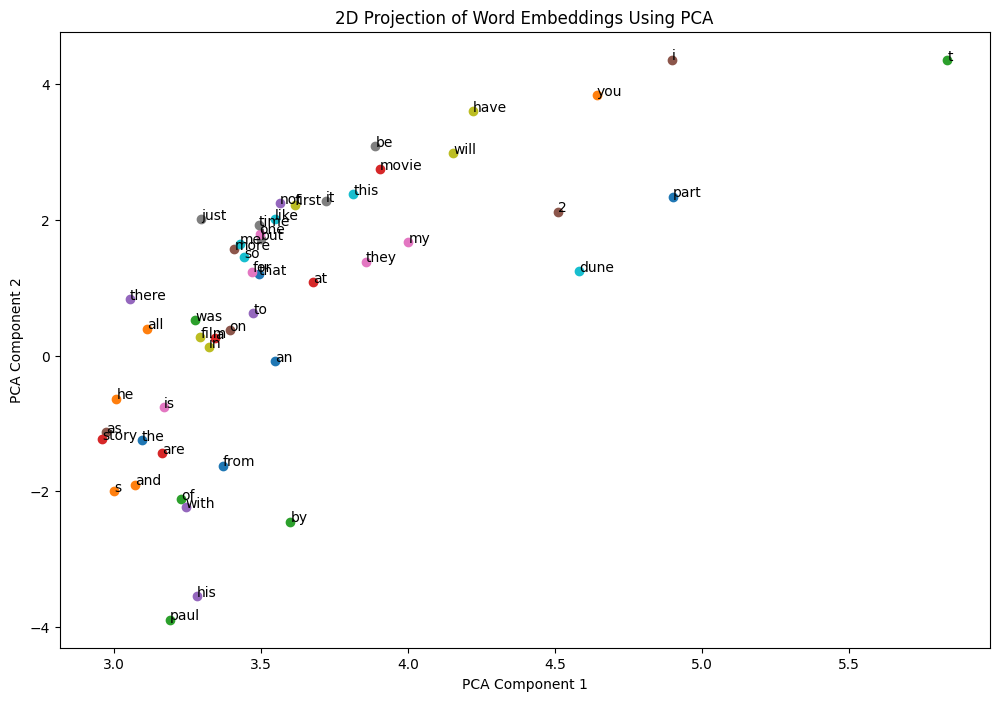

In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from gensim.models import Word2Vec

# Load the pre-trained Word2Vec model
model_file = "word2vec_300d.model"
word2vec_model = Word2Vec.load(model_file)

# Get the list of words and their associated embeddings
vocab_words = list(word2vec_model.wv.index_to_key)  # Words in the model's vocabulary
embeddings = word2vec_model.wv[vocab_words]         # Corresponding vectors for each word

# Reduce dimensionality from 300 to 2 for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Visualize a subset of the words for better readability
plt.figure(figsize=(12, 8))
sample_size = 50  # Number of words to display for clarity
for i in range(sample_size):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
    plt.annotate(vocab_words[i], (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

plt.title("2D Projection of Word Embeddings Using PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [5]:
# The GitHub link of your final csv file
# https://github.com/Yusmitha-Lekha/YusmithaLekha_INFO5731_Fall2024/blob/main/sentiment_annotated_reviews.csv

# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [6]:
"""
This assignment was both challenging and rewarding. One of the most challenging aspects was working from scratch to implement the text analysis tasks, such as TF-IDF computation and N-gram analysis, without relying on pre-existing libraries. It required a deeper understanding of the concepts and a careful approach to code each step manually. However, this process allowed me to grasp the underlying mechanics of text processing, which I found extremely valuable.

Annotating the sentiment data was time-consuming but insightful. Reading each review closely to label sentiment helped me better understand the nuances of text classification, though it required patience and focus. I enjoyed the visualization part of the assignment, as it was satisfying to see the patterns in word embeddings and to understand how text data could be represented in a spatial format.

In terms of the time provided, I feel that it was mostly adequate, though the manual annotation process could benefit from a slightly longer time frame. Overall, the assignment provided a solid hands-on experience, helping me build foundational skills in natural language processing and data analysis."""

'\nThis assignment was both challenging and rewarding. One of the most challenging aspects was working from scratch to implement the text analysis tasks, such as TF-IDF computation and N-gram analysis, without relying on pre-existing libraries. It required a deeper understanding of the concepts and a careful approach to code each step manually. However, this process allowed me to grasp the underlying mechanics of text processing, which I found extremely valuable.\n\nAnnotating the sentiment data was time-consuming but insightful. Reading each review closely to label sentiment helped me better understand the nuances of text classification, though it required patience and focus. I enjoyed the visualization part of the assignment, as it was satisfying to see the patterns in word embeddings and to understand how text data could be represented in a spatial format.\n\nIn terms of the time provided, I feel that it was mostly adequate, though the manual annotation process could benefit from a 